In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import keras
from keras import layers
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import save_model, load_model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_counts.csv to processed_counts.csv
Saving labels.csv to labels.csv


In [ ]:
labels_pd = pd.read_csv("labels.csv")
counts_pd = pd.read_csv("processed_counts.csv").rename(columns={"Unnamed: 0": "index"})
labels_pd.head()

,index,bulk_labels
0,AAAGCCTGGCTAAC-1,CD14+ Monocyte
1,AAATTCGATGCACA-1,Dendritic
2,AACACGTGGTCTTT-1,CD56+ NK
3,AAGTGCACGTGCTA-1,CD4+/CD25 T Reg
4,ACACGAACGGAGTG-1,Dendritic


In [ ]:
counts_pd.head()

,index,HES4,TNFRSF4,SSU72,PARK7,RBP7,SRM,MAD2L2,AGTRAP,TNFRSF1B,...,ATP5O,MRPS6,TTC3,U2AF1,CSTB,SUMO3,ITGB2,S100B,PRMT2,MT-ND3
0,AAAGCCTGGCTAAC-1,-0.326,-0.191,-0.728,-0.301,3.386,-0.531,2.016,3.377,4.841,...,-0.146,-0.532,-0.341,0.303,1.404,4.294,0.519,-0.21,-0.636,4.011
1,AAATTCGATGCACA-1,1.171,-0.191,0.795,-1.200,-0.174,-0.531,1.889,-0.486,-0.459,...,-1.136,-0.532,-0.341,-0.905,2.849,-0.585,1.172,-0.21,2.630,-0.490
2,AACACGTGGTCTTT-1,-0.326,-0.191,0.483,-1.200,-0.174,-0.531,-0.451,0.971,-0.459,...,-1.136,2.606,-0.341,-0.905,-0.455,-0.585,0.722,-0.21,0.663,-0.490
3,AAGTGCACGTGCTA-1,-0.326,-0.191,1.134,-0.157,-0.174,-0.531,-0.451,-0.486,-0.459,...,1.161,-0.532,-0.341,-0.905,-0.119,-0.585,0.766,-0.21,-0.636,-0.490
4,ACACGAACGGAGTG-1,-0.326,-0.191,-0.728,-0.607,-0.174,-0.531,-0.451,0.787,-0.459,...,-1.136,0.839,1.679,-0.108,-0.534,-0.585,-0.007,-0.21,-0.636,-0.490


In [ ]:
data = counts_pd.merge(labels_pd, how="inner", left_on="index", right_on="index")
data.head()

,index,HES4,TNFRSF4,SSU72,PARK7,RBP7,SRM,MAD2L2,AGTRAP,TNFRSF1B,...,MRPS6,TTC3,U2AF1,CSTB,SUMO3,ITGB2,S100B,PRMT2,MT-ND3,bulk_labels
0,AAAGCCTGGCTAAC-1,-0.326,-0.191,-0.728,-0.301,3.386,-0.531,2.016,3.377,4.841,...,-0.532,-0.341,0.303,1.404,4.294,0.519,-0.21,-0.636,4.011,CD14+ Monocyte
1,AAATTCGATGCACA-1,1.171,-0.191,0.795,-1.200,-0.174,-0.531,1.889,-0.486,-0.459,...,-0.532,-0.341,-0.905,2.849,-0.585,1.172,-0.21,2.630,-0.490,Dendritic
2,AACACGTGGTCTTT-1,-0.326,-0.191,0.483,-1.200,-0.174,-0.531,-0.451,0.971,-0.459,...,2.606,-0.341,-0.905,-0.455,-0.585,0.722,-0.21,0.663,-0.490,CD56+ NK
3,AAGTGCACGTGCTA-1,-0.326,-0.191,1.134,-0.157,-0.174,-0.531,-0.451,-0.486,-0.459,...,-0.532,-0.341,-0.905,-0.119,-0.585,0.766,-0.21,-0.636,-0.490,CD4+/CD25 T Reg
4,ACACGAACGGAGTG-1,-0.326,-0.191,-0.728,-0.607,-0.174,-0.531,-0.451,0.787,-0.459,...,0.839,1.679,-0.108,-0.534,-0.585,-0.007,-0.21,-0.636,-0.490,Dendritic


In [ ]:
x = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [ ]:
x.head()

,HES4,TNFRSF4,SSU72,PARK7,RBP7,SRM,MAD2L2,AGTRAP,TNFRSF1B,EFHD2,...,ATP5O,MRPS6,TTC3,U2AF1,CSTB,SUMO3,ITGB2,S100B,PRMT2,MT-ND3
0,-0.326,-0.191,-0.728,-0.301,3.386,-0.531,2.016,3.377,4.841,-0.525,...,-0.146,-0.532,-0.341,0.303,1.404,4.294,0.519,-0.21,-0.636,4.011
1,1.171,-0.191,0.795,-1.200,-0.174,-0.531,1.889,-0.486,-0.459,-0.525,...,-1.136,-0.532,-0.341,-0.905,2.849,-0.585,1.172,-0.21,2.630,-0.490
2,-0.326,-0.191,0.483,-1.200,-0.174,-0.531,-0.451,0.971,-0.459,2.286,...,-1.136,2.606,-0.341,-0.905,-0.455,-0.585,0.722,-0.21,0.663,-0.490
3,-0.326,-0.191,1.134,-0.157,-0.174,-0.531,-0.451,-0.486,-0.459,-0.525,...,1.161,-0.532,-0.341,-0.905,-0.119,-0.585,0.766,-0.21,-0.636,-0.490
4,-0.326,-0.191,-0.728,-0.607,-0.174,-0.531,-0.451,0.787,-0.459,1.932,...,-1.136,0.839,1.679,-0.108,-0.534,-0.585,-0.007,-0.21,-0.636,-0.490


In [ ]:
y.head()

0     CD14+ Monocyte
1          Dendritic
2           CD56+ NK
3    CD4+/CD25 T Reg
4          Dendritic
Name: bulk_labels, dtype: object

In [ ]:
# One hot encoding of y labels
# Order chosen by proportions in sample and kept in y_labels
y_hot = pd.get_dummies(y)
y_labels = y_hot.mean(axis=0).sort_values(ascending=False).index
y_hot = y_hot[y_labels]
y_hot.head()

,Dendritic,CD14+ Monocyte,CD19+ B,CD4+/CD25 T Reg,CD8+ Cytotoxic T,CD8+/CD45RA+ Naive Cytotoxic,CD56+ NK,CD4+/CD45RO+ Memory,CD34+,CD4+/CD45RA+/CD25- Naive T
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [ ]:
# 80:20 split shuffling data
x_train, x_test, y_train, y_test = train_test_split(x, y_hot, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [ ]:
# Shape validation for x
x.shape, x_train.shape, x_test.shape

((700, 765), (560, 765), (140, 765))

In [ ]:
# Shape validation for y
y.shape, y_train.shape, y_test.shape

((700,), (560, 10), (140, 10))

In [ ]:
# Autoencoder following instructions and recommendations:
# Latent space of 32 dimensions
# 1 hidden layer for encoder and one for decoder
# L1 regularization used in fully connected layers
# Dropout used wherever possible since a very small dataset was provided...
# ...this somewhat avoids crude memorization of the train set
# Encoder will be defined later after training

encoding_dim = 32
input_dim = 765

input_obj = keras.Input(shape=(input_dim,))
dropout1 = layers.Dropout(.2)(input_obj)
hidden1 = layers.Dense(128, activation='relu', 
                       activity_regularizer=regularizers.l1(10e-5))(dropout1)
dropout2 = layers.Dropout(.2)(hidden1)
encoded = layers.Dense(encoding_dim, activation='relu', 
                       activity_regularizer=regularizers.l1(10e-5))(dropout2)
dropout3 = layers.Dropout(.2)(encoded)
hidden2 = layers.Dense(128, activation='relu')(dropout3)
dropout4 = layers.Dropout(.2)(hidden2)
decoded = layers.Dense(input_dim, activation='sigmoid')(dropout4)

autoencoder = keras.Model(input_obj, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 765)]             0         
                                                                 
 dropout (Dropout)           (None, 765)               0         
                                                                 
 dense (Dense)               (None, 128)               98048     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               4224  

In [ ]:
# Configurations for improving training with the aim to reduce over-fitting 
# and also allow to seek for a lower bias model.
# Reference: https://stackoverflow.com/questions/48285129/saving-best-model-in-keras
earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min')
mcp_save = ModelCheckpoint('autoencoder_best.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=0, min_delta=1e-4, mode='min')

In [ ]:
# Used MSE as instructed
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(
    x_train, x_train,
    epochs=500,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    verbose=0,
)

In [ ]:
# Load best
autoencoder = load_model('autoencoder_best.hdf5', compile=False)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Achieved under 0.95 loss (regularization is present here)
autoencoder.evaluate(x_test, x_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.9349


0.9349039196968079

In [ ]:
# Encoder
encoder_output = autoencoder.layers[4].output
encoder_input = autoencoder.input
encoder = keras.Model(encoder_input, encoder_output)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 765)]             0         
                                                                 
 dropout (Dropout)           (None, 765)               0         
                                                                 
 dense (Dense)               (None, 128)               98048     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
Total params: 102,176
Trainable params: 102,176
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Save model
encoder.compile(optimizer='adam', loss='mean_squared_error')
save_model(encoder, 'encoder_best.hdf5', save_format='hdf5')

In [ ]:
# PCA
pca32 = PCA(n_components=32)
x_pca = pca32.fit_transform(x)

In [ ]:
# t-SNE
tsne2 = TSNE(n_components=2, learning_rate=200, init='random', method='exact')
x_tsne2 = tsne2.fit_transform(x)

In [ ]:
# PCA to 32 dim, then t-SNE to 2 dimensions
x_pca32_tsne2 = tsne2.fit_transform(x_pca)

In [ ]:
# Encoder used to get input data's latent variables
x_encoded = encoder.predict(x)
x_encoded.shape

(700, 32)

In [ ]:
# Encoder to 32 dim, then PCA to 2 dim
pca2 = PCA(n_components=2)
x_encoded_pca2 = pca2.fit_transform(x_encoded)

In [ ]:
# Encoder to 32 dim, then t-SNE to 2 dim
x_encoded_tsne2 = tsne2.fit_transform(x_encoded)

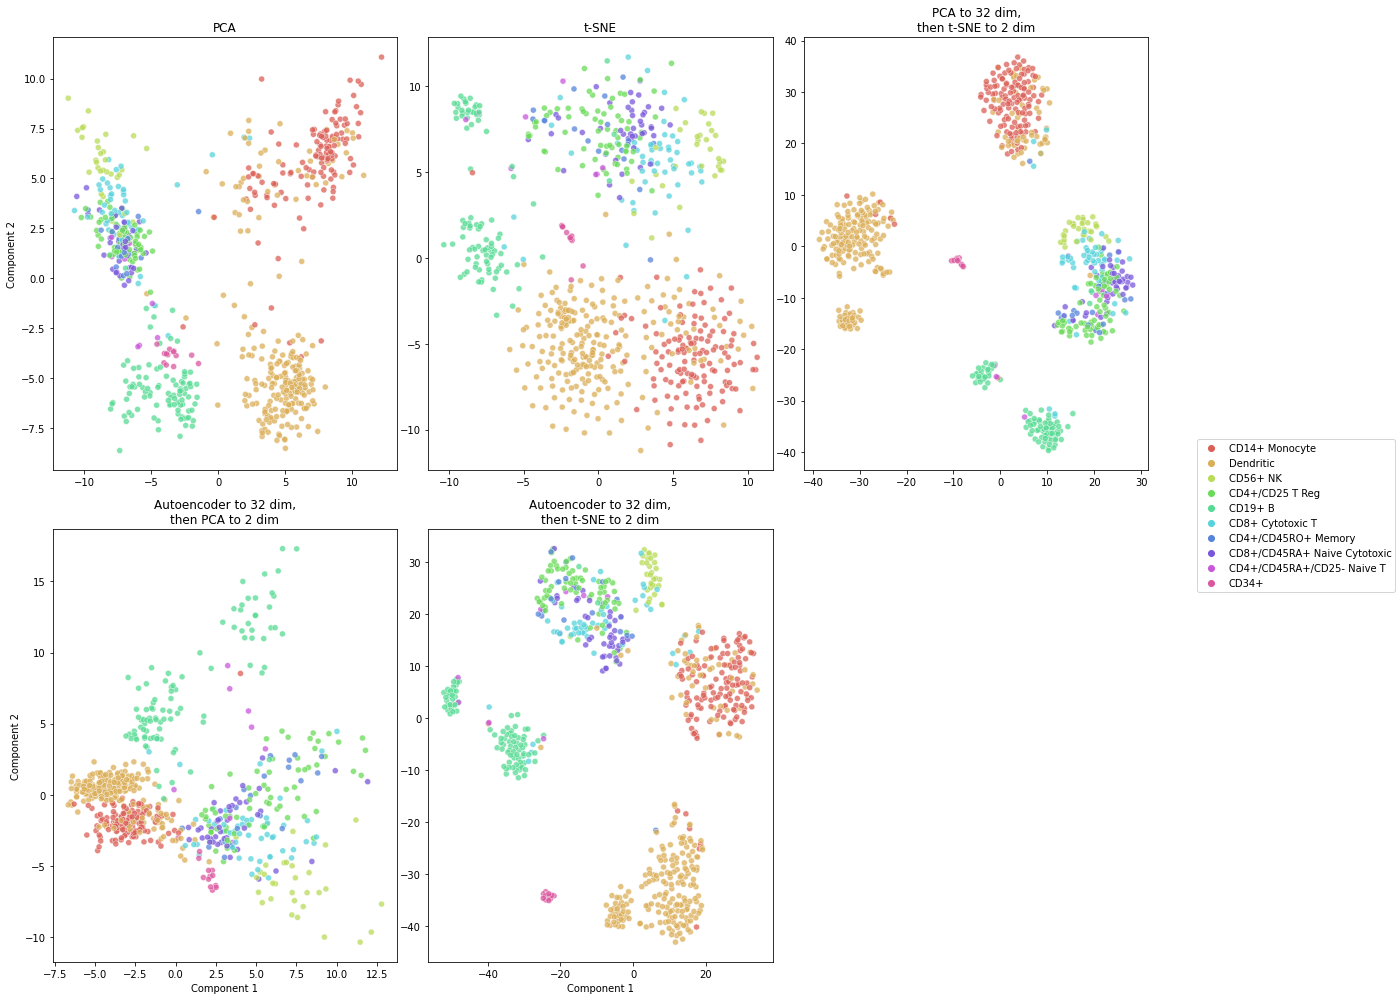

In [ ]:
# Plot 2D representations
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 14))

x_dict = {
    'PCA': x_pca[:, :2],
    't-SNE': x_tsne2,
    'PCA to 32 dim,\nthen t-SNE to 2 dim': x_pca32_tsne2,
    'Autoencoder to 32 dim,\nthen PCA to 2 dim': x_encoded_pca2,
    'Autoencoder to 32 dim,\nthen t-SNE to 2 dim': x_encoded_tsne2,
}

n = len(x_dict)

for i, (title, x_plot) in enumerate(x_dict.items()):

  row = i//3
  col = i%3
  ax_i = ax[row, col]

  sns.scatterplot(
      x=x_plot[:,0], y=x_plot[:,1],
      hue=y,
      palette=sns.color_palette("hls", 10),
      legend="full",
      alpha=0.75,
      ax=ax_i)
  if i == n - 1:
    handles, labels = ax_i.get_legend_handles_labels()
  ax_i.get_legend().remove()
  ax_i.set_title(title)
  if row == nrows - 1:
    ax_i.set_xlabel('Component 1')
  if col == 0:
    ax_i.set_ylabel('Component 2')

for i in range(n, nrows*ncols):

  row = i//3
  col = i%3
  ax[row, col].axis('off')

fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.4), loc='lower center', ncol=1)
fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig('projection.jpg', format='jpg')
plt.show()